## Creating figures with Plotly

In [1]:
import pandas as pd
import numpy as np

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

## Read in the titanic dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/austinlasseter/plotly_dash_tutorial/master/00%20resources/titanic.csv")
print(df.shape)
df.head()

(712, 6)


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [5]:
# What's the average age of passengers, by sex?
results=df.groupby('Sex')['Age'].mean()
print(results)

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64


In [6]:
# Break that down into its components
print(results.index[0])
print(results.index[1])
print(results[0])
print(results[1])

female
male
27.745173745173744
30.72664459161148


In [10]:
# Let's display that with plotly.

mydata = [go.Bar(x = results.index,
                 y = results.values,
                 marker = dict(color='rgb(100,200,300)'))]

mylayout = go.Layout(title = 'Average age by gender on the Titanic',
                     xaxis = dict(title='this is my x-axis'),
                     yaxis = dict(title='this is my y-axis'))
    
fig = go.Figure(data=mydata, layout=mylayout)
iplot(fig)

### Grouped bar chart

In [17]:
results2 = pd.DataFrame(df.groupby(['Sex', 'Embarked'])['Fare'].mean())
print(results2.columns)
print(results2.index)
results2.head()

Index(['Fare'], dtype='object')
MultiIndex(levels=[['female', 'male'], ['Cherbourg', 'Queenstown', 'Southampton']],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['Sex', 'Embarked'])


Fare
Sex    Embarked              
female Cherbourg    79.937502
       Queenstown   17.363892
       Southampton  38.572827
male   Cherbourg    58.005683
       Queenstown   18.942187

In [19]:
# In Plotly

mydata1 = go.Bar(x = results2.loc['female'].index, 
                 y = results2.loc['female']['Fare'],
                 name = 'Female'
                )
mydata2 = go.Bar(x = results2.loc['male'].index, 
                 y = results2.loc['male']['Fare'],
                 name = 'Male'
                )
mylayout = go.Layout(title='Grouped Bar Chart')
myfig = go.Figure(data=[mydata1, mydata2], layout=mylayout)
iplot(myfig)

## How about a scatterplot?

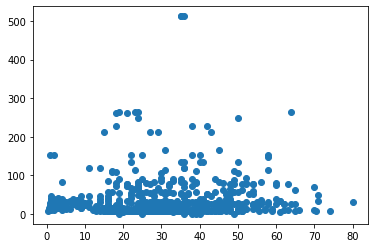

In [26]:
# First in good ol' Matplotlib.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df['Age'], y=df['Fare']);

In [25]:
# Now with plotly.
data = [go.Scatter(x=df['Age'], 
                   y=df['Fare'],
                    mode = 'markers',
)]
layout = go.Layout(
    title = 'Two passengers in their mid-30s bought some expensive tickets!', # Graph title
    xaxis = dict(title = 'Age'), # x-axis label
    yaxis = dict(title = 'Fare'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Turn all of that into a function!

In [20]:
continuous_variables = ['Age', 'Fare', 'Survived']

In [21]:
def make_my_cool_figure(continuous_var):
    results=pd.DataFrame(df.groupby(['Sex', 'Embarked'])[continuous_var].mean())
    mydata1 = go.Bar(
        x=results.loc['male'].index,
        y=results.loc['male'][continuous_var],
        name='Dudes',
        marker=dict(color='darkgreen')
    )
    mydata2 = go.Bar(
        x=results.loc['female'].index,
        y=results.loc['female'][continuous_var],
        name='Ladies',
        marker=dict(color='lightblue')
    )
    mylayout = go.Layout(
        title='Grouped bar chart',
        xaxis = dict(title = 'Gender'), # x-axis label
        yaxis = dict(title = str(continuous_var)), # y-axis label

    )
    fig = go.Figure(data=[mydata1, mydata2], layout=mylayout)
    return iplot(fig)

In [22]:
make_my_cool_figure('Survived')

In [23]:
for varname in continuous_variables:
    make_my_cool_figure(varname)